# PCA

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import time
plt.style.use('seaborn')

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target']
X_train, X_test = X[:50000], X[50000:]
y_train, y_test = y[:50000], y[50000:]

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.components_

array([[ 5.49378684e-20,  4.16333634e-17,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.04865786e-19,  0.00000000e+00,  5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.65355853e-21,  2.68882139e-17,  1.54390389e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.36945838e-01, -1.16165068e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.31191271e-01,  1.87460036e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.65547261e-01, -1.12795436e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [7]:
pca.explained_variance_ratio_

array([9.74438551e-02, 7.05984878e-02, 6.21613091e-02, 5.37948602e-02,
       4.85805454e-02, 4.31961152e-02, 3.27757401e-02, 2.88638357e-02,
       2.76883480e-02, 2.36592809e-02, 2.09951966e-02, 2.02040627e-02,
       1.71579128e-02, 1.68179478e-02, 1.57926701e-02, 1.49275322e-02,
       1.31816742e-02, 1.27655341e-02, 1.18651403e-02, 1.15102054e-02,
       1.06910666e-02, 1.00749970e-02, 9.53629769e-03, 9.07861762e-03,
       8.82788044e-03, 8.36950936e-03, 8.17540766e-03, 7.84796040e-03,
       7.42014086e-03, 6.90705897e-03, 6.58562929e-03, 6.43653009e-03,
       6.02718838e-03, 5.85302964e-03, 5.69430656e-03, 5.41852433e-03,
       5.07309113e-03, 4.88394384e-03, 4.82054469e-03, 4.73350171e-03,
       4.55971649e-03, 4.41410708e-03, 4.16427598e-03, 3.96221186e-03,
       3.85331491e-03, 3.74064624e-03, 3.61329176e-03, 3.50469133e-03,
       3.40269669e-03, 3.21046706e-03, 3.18201634e-03, 3.10987487e-03,
       2.94572321e-03, 2.88291054e-03, 2.85743237e-03, 2.70758877e-03,
      

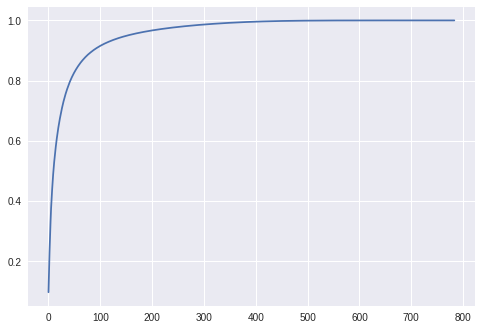

In [15]:
# get cumulative sum of explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0, len(cumsum)), cumsum);

In [16]:
# get the number of components that together produce keep at least 95% of variance of
# the original dataset
np.argmax(cumsum >= 0.95)

153

In [32]:
# reduce X_train with PCA down to 150 dimensions
pca = PCA(n_components=150)
X_train_reduce = pca.fit_transform(X_train)

# measuring training time of RandomForestClassifier (original vs reduced dataset)

In [24]:
# timing Random forest classifier learning on the original dataset
start = time.time()
forest_orig = RandomForestClassifier()
forest_orig.fit(X_train, y_train)
end = time.time()
print(end-start)

37.362677335739136


In [36]:
# timing Random forest classifier learning on the reduced dataset
start = time.time()
forest_reduced = RandomForestClassifier()
forest_reduced.fit(X_train_reduce, y_train)
end = time.time()
print(end-start)

# random forest training is slower on the reduced dataset

92.83511686325073


# MEASURING LEARNING TIME AND ACCURACY OF SVM (original vs reduced dataset)

In [38]:
from sklearn.svm import SVC

In [41]:
start = time.time()
svc_orig = SVC()
svc_orig.fit(X_train, y_train)
end = time.time()
print(end-start)

361.7027142047882


In [42]:
start = time.time()
svc_reduced = SVC()
svc_reduced.fit(X_train_reduce, y_train)
end = time.time()
print(end-start)
# svc learning time was significantly boosted

95.14568424224854


In [47]:
# comparing SVC predictions on these sets
y_pred_orig = svc_orig.predict(X_test)
y_pred_reduced = svc_reduced.predict(pca.transform(X_test))

In [50]:
from sklearn.metrics import f1_score

print(f'f1 score (original): {f1_score(y_test, y_pred_orig, average="macro")}')
print(f'f1 score (reduced) : {f1_score(y_test, y_pred_reduced, average="macro")}')
# prediction power of the SVC trained on the reduced dataset also seem to have
# increased a little

f1 score (original): 0.9792352357229431
f1 score (reduced) : 0.9820146269910477


# VISUALISING MNIST SET (2D reduced by t-SNE)

In [51]:
from sklearn.manifold import TSNE

In [54]:
# using the whole dataset for plotting purposes
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

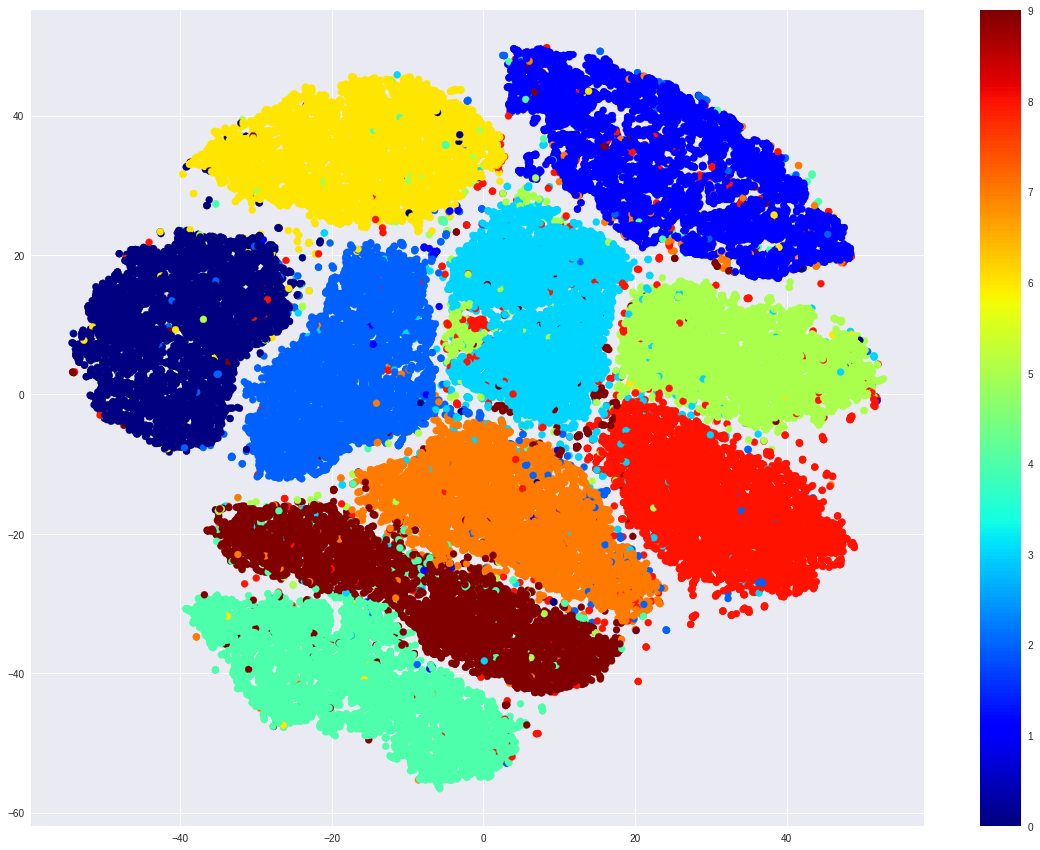

In [66]:
plt.figure(figsize=(20, 15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap='jet')
plt.colorbar()    
plt.show()